<a href="https://colab.research.google.com/github/Cralsic123/Bounding-Box-extraction-of-oxford-dataset-using-DELF/blob/main/Bounding_box(DELF)11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/Cralsic123/models.git

%cd models/research/delf

!protoc delf/protos/*.proto --python_out=.

!pip install -e .


Cloning into 'models'...
remote: Enumerating objects: 96736, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 96736 (delta 7), reused 0 (delta 0), pack-reused 96720
Receiving objects: 100% (96736/96736), 610.82 MiB | 13.66 MiB/s, done.
Resolving deltas: 100% (70419/70419), done.
/content/models/research/delf
Obtaining file:///content/models/research/delf
  Preparing metadata (setup.py) ... done
  Running setup.py develop for delf


In [ ]:
!pip install object_detection

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 28.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.4/123.4 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 74.8 MB/s eta 0:00:00


In [ ]:
import delf

In [ ]:
%cd /content/models/research/delf/delf/python/examples

/content/models/research/delf/delf/python/examples


In [ ]:
# From tensorflow/models/research/delf/delf/python/examples/
!mkdir data && cd data
!wget http://www.robots.ox.ac.uk/~vgg/data/oxbuildings/oxbuild_images.tgz
!mkdir oxford5k_images oxford5k_features
!tar -xvzf oxbuild_images.tgz -C oxford5k_images/
!cd ../
!echo data/oxford5k_images/hertford_000056.jpg >> list_images.txt
!echo data/oxford5k_images/oxford_000317.jpg >> list_images.txt

Streaming output truncated to the last 5000 lines.
all_souls_000093.jpg
all_souls_000095.jpg
all_souls_000097.jpg
all_souls_000099.jpg
all_souls_000100.jpg
all_souls_000101.jpg
all_souls_000102.jpg
all_souls_000103.jpg
all_souls_000105.jpg
all_souls_000106.jpg
all_souls_000107.jpg
all_souls_000110.jpg
all_souls_000114.jpg
all_souls_000117.jpg
all_souls_000119.jpg
all_souls_000120.jpg
all_souls_000126.jpg
all_souls_000130.jpg
all_souls_000131.jpg
all_souls_000132.jpg
all_souls_000133.jpg
all_souls_000134.jpg
all_souls_000136.jpg
all_souls_000140.jpg
all_souls_000142.jpg
all_souls_000143.jpg
all_souls_000144.jpg
all_souls_000145.jpg
all_souls_000146.jpg
all_souls_000148.jpg
all_souls_000149.jpg
all_souls_000150.jpg
all_souls_000151.jpg
all_souls_000152.jpg
all_souls_000153.jpg
all_souls_000157.jpg
all_souls_000159.jpg
all_souls_000160.jpg
all_souls_000161.jpg
all_souls_000162.jpg
all_souls_000167.jpg
all_souls_000174.jpg
all_souls_000175.jpg
all_souls_000176.jpg
all_souls_000180.jpg
all_

In [ ]:
pwd

'/content/models/research/delf/delf/python/examples'

In [ ]:
# From tensorflow/models/research/delf/delf/python/examples/
!mkdir parameters && cd parameters
!wget http://storage.googleapis.com/delf/delf_gld_20190411.tar.gz
!tar -xvzf delf_gld_20190411.tar.gz

--2024-03-23 15:11:41--  http://storage.googleapis.com/delf/delf_gld_20190411.tar.gz
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.114.207, 172.253.119.207, 108.177.111.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.114.207|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 41579253 (40M) [application/octet-stream]
Saving to: ‘delf_gld_20190411.tar.gz’

delf_gld_20190411.t 100%[===================>]  39.65M   208MB/s    in 0.2s    

2024-03-23 15:11:42 (208 MB/s) - ‘delf_gld_20190411.tar.gz’ saved [41579253/41579253]

delf_gld_20190411/
delf_gld_20190411/model/
delf_gld_20190411/model/saved_model.pb
delf_gld_20190411/model/variables/
delf_gld_20190411/model/variables/variables.data-00000-of-00001
delf_gld_20190411/model/variables/variables.index
delf_gld_20190411/pca/
delf_gld_20190411/pca/pca_proj_mat.datum
delf_gld_20190411/pca/cov.datum
delf_gld_20190411/pca/pca_variances.datum
delf_gld_20190411/pca/mean.da

In [ ]:
#!rm -r /content/models/research/delf/delf/python/examples/parameters/delf_gld_20190411

In [ ]:
!cp -r /content/models/research/delf/delf/python/examples/delf_gld_20190411* /content/models/research/delf/delf/python/examples/parameters


In [ ]:
#!rm -r /content/models/research/delf/delf/python/examples/data/oxford5k_features/oxford5k_images

In [ ]:
!cp -r /content/models/research/delf/delf/python/examples/oxford5k_images* /content/models/research/delf/delf/python/examples/data/


In [ ]:
# From tensorflow/models/research/delf/delf/python/examples/
!python3 extract_features.py \
  --config_path delf_config_example.pbtxt \
  --list_images_path list_images.txt \
  --output_dir data/oxford5k_features

2024-03-23 15:11:51.309317: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-23 15:11:51.309376: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-23 15:11:51.311183: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-23 15:11:52.811761: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Reading list of images...
done! Found 2 images
2024-03-23 15:11:55.630145: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:47] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Origina

#Bouding Box#

In [ ]:
pwd

'/content/models/research/delf/delf/python/examples'

In [ ]:
# From tensorflow/models/research/delf/delf/python/examples/
!mkdir parameters && cd parameters
!wget http://storage.googleapis.com/delf/d2r_frcnn_20190411.tar.gz
!tar -xvzf d2r_frcnn_20190411.tar.gz

mkdir: cannot create directory ‘parameters’: File exists
--2024-03-23 15:12:19--  http://storage.googleapis.com/delf/d2r_frcnn_20190411.tar.gz
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.103.207, 108.177.120.207, 142.250.159.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.103.207|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 160575458 (153M) [application/octet-stream]
Saving to: ‘d2r_frcnn_20190411.tar.gz’

d2r_frcnn_20190411. 100%[===================>] 153.14M   296MB/s    in 0.5s    

2024-03-23 15:12:19 (296 MB/s) - ‘d2r_frcnn_20190411.tar.gz’ saved [160575458/160575458]

d2r_frcnn_20190411/
d2r_frcnn_20190411/saved_model.pb
d2r_frcnn_20190411/variables/
d2r_frcnn_20190411/variables/variables.data-00000-of-00001
d2r_frcnn_20190411/variables/variables.index


In [ ]:
!cp -r /content/models/research/delf/delf/python/examples/d2r_frcnn_20190411* /content/models/research/delf/delf/python/examples/parameters


In [ ]:
# From tensorflow/models/research/delf/delf/python/examples/
!python3 extract_boxes.py \
  --detector_path parameters/d2r_frcnn_20190411 \
  --detector_thresh 0.8 \
  --list_images_path list_images.txt \
  --output_dir data/oxford5k_boxes \
  --output_viz_dir data/oxford5k_boxes_viz

2024-03-23 15:05:50.174882: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-23 15:05:50.174995: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-23 15:05:50.177101: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-23 15:05:51.669449: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Reading list of images...
done! Found 2 images
W0323 15:05:54.632266 140685985697792 wrap_function.py:208] Unable to create a python object for variable <tf.Variable 'FirstStageFeatureExtractor/resnet_v1_50/conv1/weights:0' shape=(7, 7, 3, 6

In [ ]:
!echo data/oxford5k_images/all_souls_000006.jpg >> list_images_test2.txt
!echo data/oxford5k_images/all_souls_000007.jpg >> list_images_test2.txt




In [ ]:
# From tensorflow/models/research/delf/delf/python/examples/
!python3 extract_boxes.py \
  --detector_path parameters/d2r_frcnn_20190411 \
  --detector_thresh 0.8 \
  --list_images_path list_images_test2.txt \
  --output_dir data/oxford5k_boxes \
  --output_viz_dir data/oxford5k_boxes_viz

2024-03-23 14:40:28.345499: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-23 14:40:28.345588: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-23 14:40:28.347081: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-23 14:40:29.621254: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Reading list of images...
done! Found 2 images
W0323 14:40:32.476111 135432538157056 wrap_function.py:208] Unable to create a python object for variable <tf.Variable 'FirstStageFeatureExtractor/resnet_v1_50/conv1/weights:0' shape=(7, 7, 3, 6

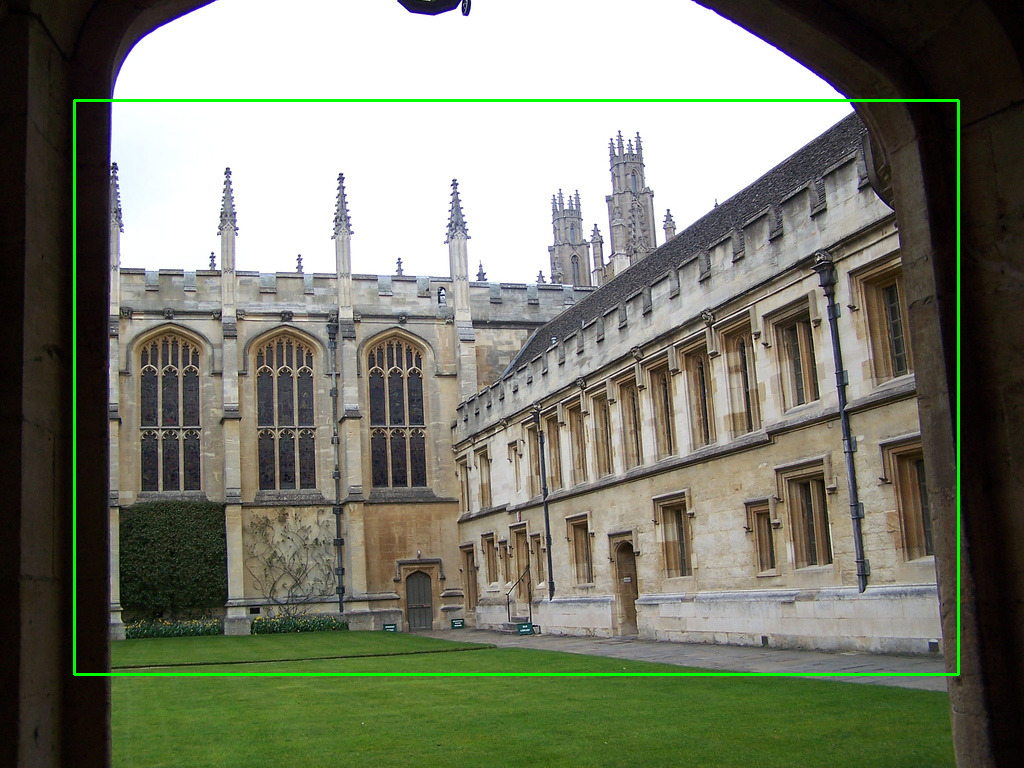

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
def draw_bounding_box(image_path, xmin, xmax, ymin, ymax, color=(0, 255, 0), thickness=2):
    # Load the image
    image = cv2.imread(image_path)

    # Get image dimensions
    height, width, _ = image.shape

    # Convert normalized coordinates to pixel values
    xmin_pixel = int(xmin * width)
    xmax_pixel = int(xmax * width)
    ymin_pixel = int(ymin * height)
    ymax_pixel = int(ymax * height)

    # Draw bounding box
    pt1 = (xmin_pixel, ymin_pixel)  # Top-left corner
    pt2 = (xmax_pixel, ymax_pixel)  # Bottom-right corner
    cv2.rectangle(image, pt1, pt2, color, thickness)

    # Display the image
    cv2_imshow(image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Example coordinates
xmin = 0.07317421585321426
xmax = 0.9358738660812378
ymin = 0.1303582638502121
ymax = 0.8779440522193909

# Example image path
image_path = '/content/models/research/delf/delf/python/examples/data/oxford5k_images/all_souls_000008.jpg'


# Draw bounding box on the image
draw_bounding_box(image_path, xmin, xmax, ymin, ymax)


In [ ]:
!find data/oxford5k_images/ -type f -name "*.jpg" > list_images_for_all.txt

In [ ]:
# From tensorflow/models/research/delf/delf/python/examples/
!python3 extract_boxes.py \
  --detector_path parameters/d2r_frcnn_20190411 \
  --detector_thresh 0.8 \
  --list_images_path list_images_for_all.txt \
  --output_dir data/oxford5k_boxes \
  --output_viz_dir data/oxford5k_boxes_viz

2024-03-23 15:14:51.215502: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-23 15:14:51.215551: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-23 15:14:51.216833: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-23 15:14:52.221186: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Reading list of images...
done! Found 5063 images
2024-03-23 15:14:55.431268: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:47] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Orig

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import shutil
shutil.move("/content/models/research/delf/delf/python/examples/data/oxford5k_boxes_viz", "/content/drive/My Drive/")


'/content/drive/My Drive/oxford5k_boxes_viz'